Section A: Python & Data Manipulation

Q1. Data Cleanup & Summary 

In [ ]:
def student_scores(df):
     # Fill missing numeric values with column mean
    numeric_columns = ['Math', 'Science', 'English']
    for column in numeric_columns:
        df[column].fillna(df[column].mean(), inplace=True)

    # Convert Gender to binary: Male = 1, Female = 0
    df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

    # Return average scores by grouping gender
    summary = df.groupby('Gender')[numeric_columns].mean().reset_index()
    return summary


Q2. Dictionary-Based Stats

In [3]:
def scores_stats(user_scores):
    result = {}
    # Calculating average, minimum, and maximum scores for each user
    for user, scores in user_scores.items():
        average_score = sum(scores) / len(scores)
        minimun_score = min(scores)
        maximum_score = max(scores)

        result[user] = {
            'average': average_score,
            'min': minimun_score,
            'max': maximum_score
        }

    return result
    

Section B: Machine Learning 

Q3. Classifier on Iris 

In [4]:
#Necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Loading the dataset
from sklearn.datasets import load_iris
iris = load_iris()
# Creating a DataFrame from the iris dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
# Displaying the first few rows of the DataFrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
# Creating a DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Splitting the dataset into features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model to the training data
dt_clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = dt_clf.predict(X_test)

# Evaluating the model's performance
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(cm)


Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


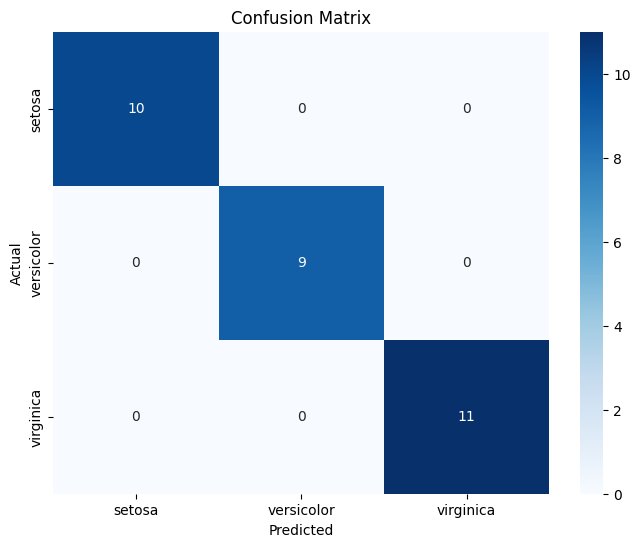

In [19]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Q4. Simple Regression

In [21]:
# Since the datatset is not available, we will create a sample synthetic DataFrame for the purpose of modelling

np.random.seed(42)

n = 100

area = np.random.randint(500, 5000, n)
bedrooms = np.random.randint(1, 6, n)
price = (area * 200) + (bedrooms * 5000) + np.random.randint(-10000, 10000, n)

df = pd.DataFrame({
    'Area': area,
    'Bedrooms': bedrooms,
    'Price': price
})

df.head()

,Area,Bedrooms,Price
0,1360,2,291360
1,4272,2,872743
2,3592,4,734159
3,966,5,210585
4,4926,3,1001311


In [24]:
# Creating a Linear Regression model
from sklearn.linear_model import LinearRegression

# Splitting the dataset into features and target variable
X = df[['Area', 'Bedrooms']]
y = df['Price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model to the training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluating the model's performance
from sklearn.metrics import mean_absolute_error, r2_score
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 4018.4177815756293
R^2 Score: 0.9996057377441592


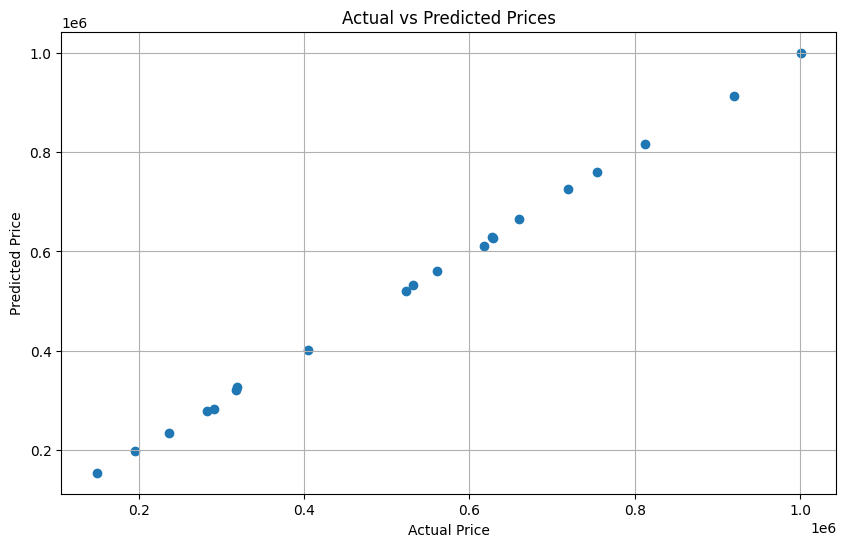

In [28]:
# Plotting the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

Section C: AI/ML Application & Thinking 

Q5. Conceptual

Overfitting in machine learning - Overfitting is when a model learns the training data too well including its noise resulting in poor performance on new, unseen data.

Decision Tree over Logistic Regression - Decision Tree is used when we need a model that handles non-linear relationships, is easy to interpret, and works with both numerical and categorical data.

Need of Train Test Split - Train-test split separates data so the model can be trained on one part and tested on unseen data. Without this, we might build a model that only works well on the training data (overfitting).

Normalization - Normalization helps put all your data on the same scale, so no feature unfairly dominates just because of its size.Especially when the algorithm depends on distances or gradual improvements.

Classification Vs Regression - Classification predicts categories or labels (like spam or not spam), while regression predicts continuous numeric values (like house prices).

Q6. Simple NLP Task – Sentiment Classification

In [29]:
# Load the dataset
from sklearn.datasets import fetch_20newsgroups

# Load data for only two categories
categories = ['rec.autos', 'comp.sys.mac.hardware']

train_data = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
test_data = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

# Convert the text data into a TF-IDF feature vector
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data.data)
X_test = vectorizer.transform(test_data.data)

# Train the Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, train_data.target)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_data.target, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.911651728553137
